In [1]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
weatherData = pd.read_csv('/content/drive/MyDrive/datasets/Iot_processed/IoT_Weather.csv')
weatherData.head()

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [5]:
# weatherData = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_IoT_dataset/IoT_Weather.csv')
# weatherData.head()

In [6]:
weatherData.drop('type', axis = 1, inplace=True)
weatherData.drop(weatherData.iloc[:, 0:2], axis = 1, inplace=True)
weatherData.head()

,temperature,pressure,humidity,label
0,31.788508,1.035,32.036579,0
1,41.630997,1.035,30.886165,0
2,42.256959,1.035,19.755908,0
3,49.116581,1.035,78.949621,0
4,24.017085,1.035,40.001059,0


In [7]:
# import matplotlib.pyplot as plt
# columns = weatherData.columns
# for col in columns:
#     print("col: ", col)
#     weatherData[col].hist(bins = 100)
#     plt.show()

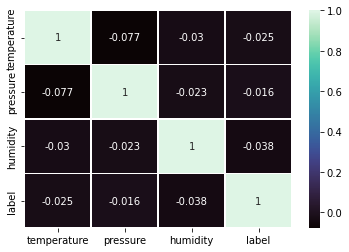

In [8]:
sns.heatmap(weatherData.corr(), annot=True, linewidth = 0.5, cmap='mako')

# **Train Test with Skfold**

In [38]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

x=weatherData[['temperature',	'pressure',	'humidity']]
y=weatherData['label']

# **Logistic Regression**

In [39]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [40]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

In [30]:
# from sklearn.preprocessing import StandardScaler
# sc= StandardScaler()
# x_train = sc.fit_transform(x_train)

In [41]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of LR: ",lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of LR: ",lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
print('AUC Score of LR:',lrAuc)

[1 1 1 ... 1 0 1]
Accuracy of LR:  51.32
f1_score of LR:  23.57
AUC Score of LR: 52.41


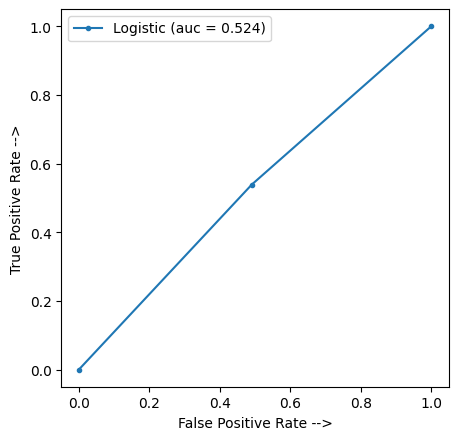

In [42]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

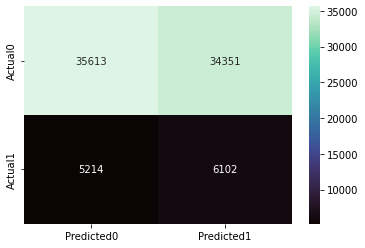

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_lr)

# **Oversampling**

In [44]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 489754, 1: 79208}
After oversampling {0: 489754, 1: 489754}


In [47]:
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]



lr = LogisticRegression()
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
ovr_lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of lr after oversampling:",ovr_lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
ovr_lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of lr after oversampling:",ovr_lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
ovr_lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
print('AUC Score of lr after oversampling:', ovr_lrAuc)

[1 0 1 ... 1 0 1]
Accuracy of lr after oversampling: 52.67
f1_score of lr after oversampling: 53.34
AUC Score of lr after oversampling: 52.67


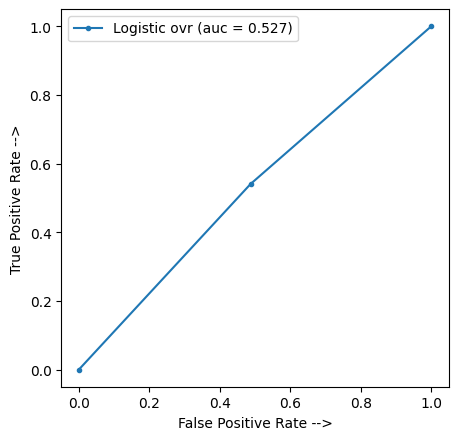

In [16]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic ovr (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


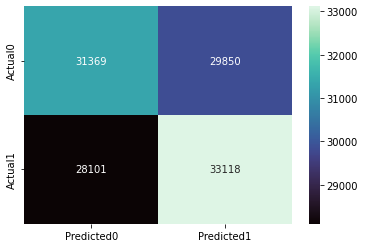

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_lr)

In [ ]:
!pip install interpret

In [19]:
from interpret.blackbox import LimeTabular
from interpret import show
# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(predict_fn=lr.predict_proba, 
                   data=x_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(x_test[-20:], 
                                y_test[-20:], 
                                name='LIME')
show(lime_local)

# Result when we use undersampling on the data

In [ ]:
x=weatherData[['temperature',	'pressure',	'humidity']]
y=weatherData['label' ]

In [ ]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_unsampled, y_unsampled = rus.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_unsampled))

Before undersampling Counter({0: 489754, 1: 79208})
After undersampling Counter({0: 79208, 1: 79208})


In [ ]:
# --------------------------Logistic Reg -----------------------------------

for train_index, test_index in skf.split(x_unsampled, y_unsampled):
    x_train, x_test, y_train, y_test = x_unsampled.iloc[train_index], x_unsampled.iloc[test_index], y_unsampled.iloc[train_index], y_unsampled.iloc[test_index]

lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
und_lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of lr undersampled : ",und_lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
und_lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of lr undersampled: ",und_lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
try:
  und_lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
  print('AUC Score of lr undersampled:', und_lrAuc)
except ValueError:
    pass

[0 1 0 ... 1 1 1]
Accuracy of lr undersampled :  53.19
f1_score of lr undersampled:  53.77
AUC Score of lr undersampled: 53.19


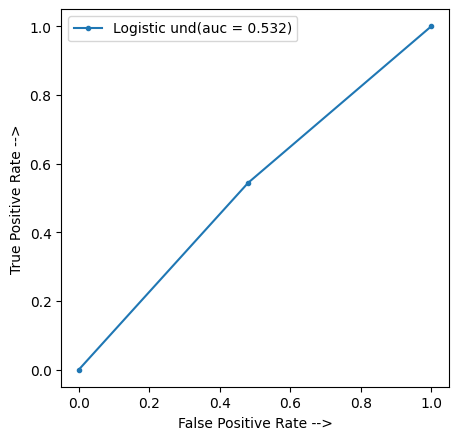

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic und(auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

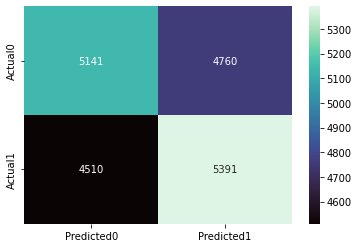

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_lr)

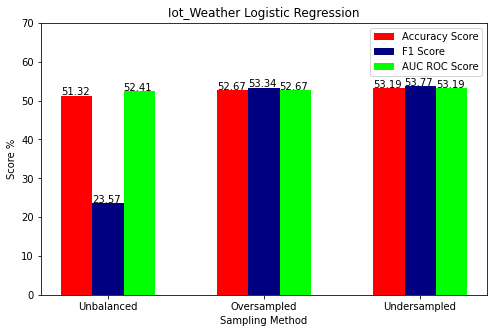

In [ ]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
all_accuracy_scores = [lrAccuracy, ovr_lrAccuracy, und_lrAccuracy]
all_f1_scores = [lrF1, ovr_lrF1, und_lrF1]
all_auc_roc_scores = [lrAuc, ovr_lrAuc, und_lrAuc]

x_labels = ['Unbalanced', 'Oversampled', 'Undersampled']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.15))

width = 0.2

x_all_accuracy_score = [x-width for x in range (len(all_accuracy_scores))]
x_all_f1_score = [x for x in range (len(all_f1_scores))]
x_all_auc_roc_score = [x+width for x in range (len(all_auc_roc_scores))]

fig,ax = plt.subplots(figsize = (8, 5))
rect1 = ax.bar(x_all_accuracy_score ,all_accuracy_scores, width, label='Accuracy Score', color = 'red')
rect2 = ax.bar(x_all_f1_score, all_f1_scores, width, label='F1 Score', color='navy')
rect3 = ax.bar(x_all_auc_roc_score, all_auc_roc_scores, width, label='AUC ROC Score', color='lime')
plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Iot_Weather Logistic Regression')
ax.set_xlabel('Sampling Method')
ax.set_ylabel('Score %')
plt.ylim([0, 70])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()